In [1]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from scipy.stats import skew
import os
import csv
import pandas as pd
from tqdm import tqdm

In [2]:
df = pd.read_csv("/Users/maengjuseog/Desktop/3-2/DeepLearningClass/Data/abalone.csv")

In [4]:
df

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [5]:
df.columns

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole_weight',
       'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

In [85]:
# 유니크한 라벨을 정렬
unique_labels = sorted(df['Rings'].unique())

# 라벨-인덱스 매핑 생성
label_to_index = {label: idx for idx, label in enumerate(unique_labels)}

# 라벨 재매핑
df['Rings'] = df['Rings'].map(label_to_index)

# 'Rings'의 값별 빈도 계산
value_counts = df['Rings'].value_counts()

# 빈도가 4 이하인 'Rings' 값 찾기
values_to_remove = value_counts[value_counts <= 4].index

# 해당 값들을 가진 행 제거
df = df[~df['Rings'].isin(values_to_remove)]

df

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,14
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,6
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,8
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,9
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,6
...,...,...,...,...,...,...,...,...,...,...
4172,4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,10
4173,4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,9
4174,4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,8
4175,4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,9


In [86]:
df['Rings'].value_counts()

Rings
8     689
9     634
7     568
10    487
6     391
11    267
5     259
12    203
13    126
4     115
14    103
15     67
16     58
3      57
17     42
18     32
19     26
2      15
20     14
22      9
21      6
Name: count, dtype: int64

Text(0, 0.5, 'Count')

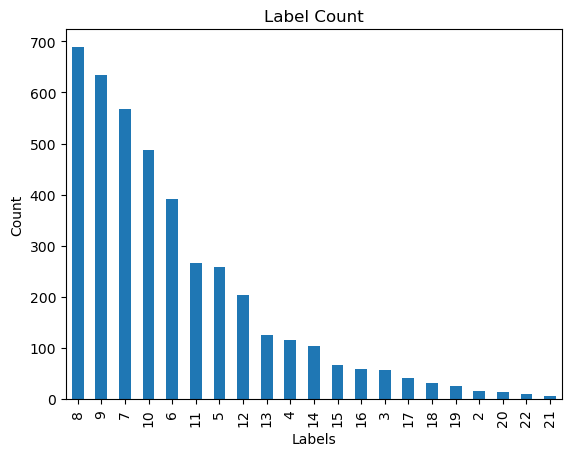

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

# 레이블별 갯수 확인
label_counts = df['Rings'].value_counts()

# 바 그래프 그리기
label_counts.plot(kind='bar')

# 그래프 제목 및 라벨 설정
plt.title('Label Count')
plt.xlabel('Labels')
plt.ylabel('Count')

In [88]:
X = df.drop(['Rings','Sex'],axis=1)
X.head()

,id,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [89]:
Y = df['Rings']
Y.head()

0    14
1     6
2     8
3     9
4     6
Name: Rings, dtype: int64

In [90]:
Y

0       14
1        6
2        8
3        9
4        6
        ..
4172    10
4173     9
4174     8
4175     9
4176    11
Name: Rings, Length: 4168, dtype: int64

In [91]:
X

,id,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [92]:
df['Rings'].value_counts()

Rings
8     689
9     634
7     568
10    487
6     391
11    267
5     259
12    203
13    126
4     115
14    103
15     67
16     58
3      57
17     42
18     32
19     26
2      15
20     14
22      9
21      6
Name: count, dtype: int64

In [93]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.20,random_state=0) 

In [94]:
from sklearn.model_selection import train_test_split
X_train_R,X_test_R, y_train_R,y_test_R = train_test_split(X,Y,test_size=0.25) 

In [95]:
from collections import Counter
import numpy as np

def split_sequences(sequences, n_steps):
    X, y = list(), list()  # 빈 리스트를 생성하여 시퀀스 데이터와 레이블을 담을 공간을 만듦
    for i in range(len(sequences)):  # 전체 시퀀스 데이터를 순회
        # find the end of this pattern
        end_ix = i + n_steps  # 현재 인덱스(i)에서 n_steps만큼 떨어진 시퀀스의 끝을 계산
        # check if we are beyond the dataset
        if end_ix > len(sequences):  # 시퀀스 끝이 데이터의 범위를 넘어서는지 확인
            break  # 범위를 넘으면 루프 종료
        # gather input (X) and output parts (y)
        seq_x = sequences[i:end_ix, :-1]  # 입력 데이터 (특징 데이터)
        seq_y_values = sequences[i:end_ix, -1]  # 시퀀스 동안의 출력 데이터 (레이블들)
        
        # 가장 빈번하게 나온 레이블 찾기
        most_common_label = Counter(seq_y_values).most_common(1)[0][0]
        
        X.append(seq_x)  # 입력 데이터 추가
        y.append(most_common_label)  # 가장 많이 나온 레이블 추가
    
    return np.array(X), np.array(y)  # 리스트를 numpy 배열로 변환하여 반환

In [96]:
# Merge train and test X/y data to apply sequence transformation function
y_train_array = np.array(y_train)
train_set = np.c_[X_train, y_train_array]

y_test_array = np.array(y_test)
test_set = np.c_[X_test, y_test_array]

In [97]:
n_step = 3 

X_train_seq, y_train_seq = split_sequences(train_set, n_step)
print(X_train_seq.shape, y_train_seq.shape)

X_test_seq, y_test_seq = split_sequences(test_set, n_step)
print(X_test_seq.shape, y_test_seq.shape)

(3332, 3, 8) (3332,)
(832, 3, 8) (832,)


In [98]:
# Merge train and test X/y data to apply sequence transformation function
y_train_array_R = np.array(y_train_R)
train_set_R = np.c_[X_train_R, y_train_array_R]

y_test_array_R = np.array(y_test_R)
test_set_R = np.c_[X_test_R, y_test_array_R]

In [99]:
n_step = 3 

X_train_seq_R, y_train_seq_R = split_sequences(train_set_R, n_step)
print(X_train_seq_R.shape, y_train_seq_R.shape)

X_test_seq_R, y_test_seq_R = split_sequences(test_set_R, n_step)
print(X_test_seq_R.shape, y_test_seq_R.shape)

(3124, 3, 8) (3124,)
(1040, 3, 8) (1040,)


In [100]:
from keras.utils import to_categorical

# Convert output variables to categorical for CNN
y_train_seq = to_categorical(y_train_seq)
print(y_train_seq.shape)

y_test_seq = to_categorical(y_test_seq)
print(y_test_seq.shape)

(3332, 23)
(832, 23)


In [101]:
# Convert output variables to categorical for CNN
y_train_seq_R = to_categorical(y_train_seq_R)
print(y_train_seq_R.shape)

y_test_seq_R = to_categorical(y_test_seq_R)
print(y_test_seq_R.shape)

(3124, 23)
(1040, 23)


In [102]:
# Produce variables for CNN input/output shape
n_timesteps, n_features, n_outputs = X_train_seq.shape[1], X_train_seq.shape[2], y_train_seq.shape[1]
print(n_timesteps, n_features, n_outputs)

3 8 23


In [103]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# cnn model vary kernel size
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from keras.utils import to_categorical

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.layers import TimeDistributed, Conv1D, MaxPooling1D

In [104]:
# Build CNN model using keras. For model building suggestions, referenced:
# https://machinelearningmastery.com/deep-learning-models-for-human-activity-recognition/
# https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/
# https://machinelearningmastery.com/how-to-develop-convolutional-neural-network-models-for-time-series-forecasting/

# Sequential model type
model = Sequential()
model.add(LSTM(units=128, input_shape = (n_timesteps,n_features)))
model.add(Dense(128, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [105]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 128)            │        70,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 23)             │         2,967 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,623 (350.09 KB)

 Trainable params: 89,623 (350.09 KB)

 Non-trainable params: 0 (0.00 B)

In [106]:
history = model.fit(X_train_seq, y_train_seq, epochs = 20, batch_size = 32, validation_split = 0.1, shuffle = True)

Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1491 - loss: 2.6310 - val_accuracy: 0.1677 - val_loss: 2.3903
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1728 - loss: 2.4445 - val_accuracy: 0.1737 - val_loss: 2.3821
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1897 - loss: 2.4236 - val_accuracy: 0.1796 - val_loss: 2.3843
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1787 - loss: 2.4338 - val_accuracy: 0.1677 - val_loss: 2.3769
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1633 - loss: 2.4508 - val_accuracy: 0.1737 - val_loss: 2.3903
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1806 - loss: 2.4719 - val_accuracy: 0.1796 - val_loss: 2.3884
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1709 - loss: 2.4513 - val_accuracy: 0.1647 - val_loss: 2.3848
Epoch 8/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1848 - loss: 2.4428 - val_accuracy: 0.1826 - val_loss:

count값이 2개 이하인 값들이 존재하여 나누었을 시 라벨 갯수가 달라지는 문제점이 있어 해당 행들을 삭제 -> 정확도가 매우 떨어지는 문제점 발견
하지만 해결방법을 모르겠음

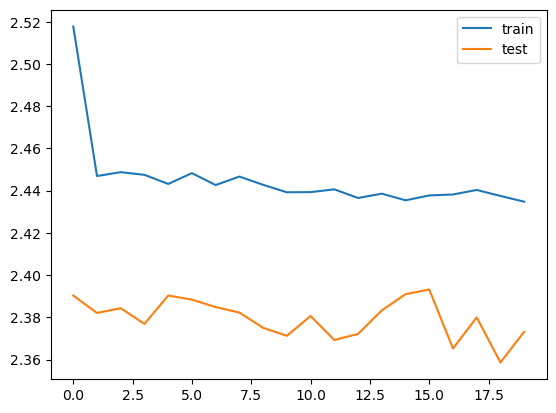

In [107]:
plt.plot(history.history["loss"], label = "train")
plt.plot(history.history["val_loss"], label = "test")
plt.legend()

In [108]:
model.evaluate(X_train_seq, y_train_seq)

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - accuracy: 0.2007 - loss: 2.4313


[2.4184908866882324, 0.19177670776844025]

In [109]:
model.evaluate(X_test_seq, y_test_seq)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1392 - loss: 2.5224 


[2.5115535259246826, 0.16466346383094788]

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Confusion Matrix


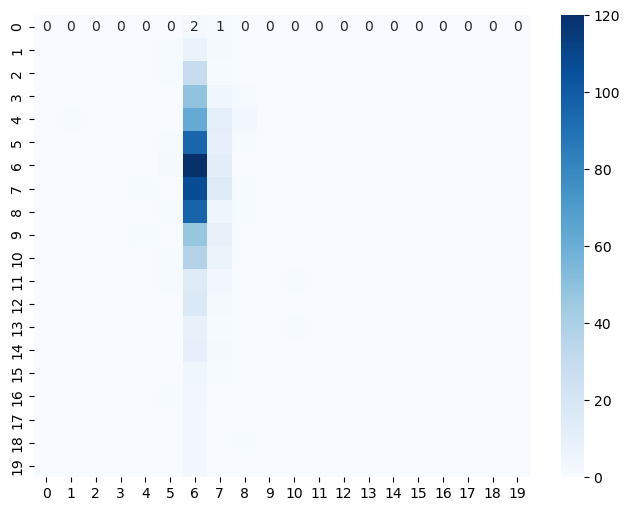

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_test_arg=np.argmax(y_test_seq, axis=1)
Y_pred = np.argmax(model.predict(X_test_seq),axis=1)
print('Confusion Matrix')
cm = confusion_matrix(y_test_arg, Y_pred)
# 시각화
plt.figure(figsize=(8, 6))  # 그래프 크기 조절 (너비 8, 높이 6)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# 그래프 표시
plt.show()

In [111]:
base_loss,base_accuracy=model.evaluate(X_test_seq, y_test_seq)

model_file='E:/dataset/HAR/DSADS/RA_Model.h5'
  
tf.keras.models.save_model(model, model_file, include_optimizer=False)
print('model saved at ', model_file)
#score,keras_file=evaluate_model(trainX,trainy,testX,testy)
score=base_accuracy*100
print('Accuracy >{:f}'.format(score))
print('Base Loss >{:.2f}'.format(base_loss))

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1392 - loss: 2.5224 


model saved at  E:/dataset/HAR/DSADS/RA_Model.h5
Accuracy >16.466346
Base Loss >2.51


In [112]:
# Build CNN model using keras. For model building suggestions, referenced:
# https://machinelearningmastery.com/deep-learning-models-for-human-activity-recognition/
# https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/
# https://machinelearningmastery.com/how-to-develop-convolutional-neural-network-models-for-time-series-forecasting/

# Sequential model type
model2 = Sequential()
model2.add(LSTM(units=128, input_shape = (n_timesteps,n_features)))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(n_outputs, activation='softmax'))
model2.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [113]:
model2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 128)            │        70,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 23)             │         2,967 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,623 (350.09 KB)

 Trainable params: 89,623 (350.09 KB)

 Non-trainable params: 0 (0.00 B)

In [114]:
history2 = model2.fit(X_train_seq_R, y_train_seq_R, epochs = 20, batch_size = 32, validation_split = 0.1, shuffle = True)

Epoch 1/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1512 - loss: 2.6242 - val_accuracy: 0.1438 - val_loss: 2.4658
Epoch 2/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1666 - loss: 2.4534 - val_accuracy: 0.1342 - val_loss: 2.4830
Epoch 3/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1915 - loss: 2.4323 - val_accuracy: 0.1438 - val_loss: 2.4649
Epoch 4/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1694 - loss: 2.4524 - val_accuracy: 0.1342 - val_loss: 2.4821
Epoch 5/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1565 - loss: 2.4300 - val_accuracy: 0.1438 - val_loss: 2.4931
Epoch 6/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1634 - loss: 2.4217 - val_accuracy: 0.1214 - val_loss: 2.4839
Epoch 7/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1700 - loss: 2.4193 - val_accuracy: 0.1438 - val_loss: 2.4784
Epoch 8/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1574 - loss: 2.4114 - val_accuracy: 0.1278 - val_loss:

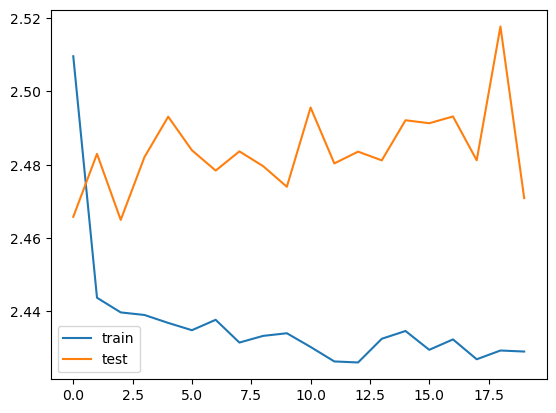

In [115]:
plt.plot(history2.history["loss"], label = "train")
plt.plot(history2.history["val_loss"], label = "test")
plt.legend()

In [116]:
model2.evaluate(X_train_seq_R, y_train_seq_R)

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - accuracy: 0.1707 - loss: 2.4284


[2.4246578216552734, 0.17381562292575836]

In [117]:
model2.evaluate(X_test_seq_R, y_test_seq_R)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1758 - loss: 2.4877 


[2.4703009128570557, 0.1855769157409668]

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Confusion Matrix


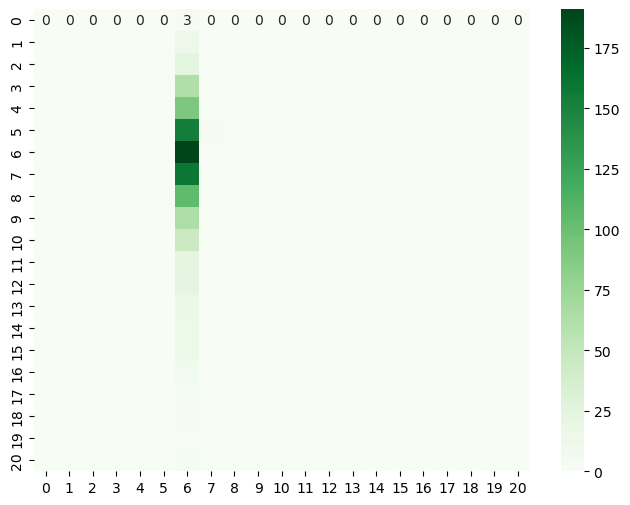

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_test_arg=np.argmax(y_test_seq_R, axis=1)
Y_pred = np.argmax(model2.predict(X_test_seq_R),axis=1)
print('Confusion Matrix')
cm = confusion_matrix(y_test_arg, Y_pred)
# 시각화
plt.figure(figsize=(8, 6))  # 그래프 크기 조절 (너비 8, 높이 6)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")

# 그래프 표시
plt.show()

In [120]:
base_loss,base_accuracy=model2.evaluate(X_test_seq_R, y_test_seq_R)

model_file2='E:/dataset/HAR/DSADS/LA_Model.h5'
  
tf.keras.models.save_model(model2, model_file2, include_optimizer=False)
print('model saved at ', model_file2)
score=base_accuracy*100
print('Accuracy >{:f}'.format(score))
print('Base Loss >{:.2f}'.format(base_loss))

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - accuracy: 0.1758 - loss: 2.4877


model saved at  E:/dataset/HAR/DSADS/LA_Model.h5
Accuracy >18.557692
Base Loss >2.47


In [121]:
# Base 모델을 로드 (LA_Model.h5)
from tensorflow.keras.models import load_model

base_model = load_model(model_file)

In [122]:
base_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')
base_model.evaluate(X_test_seq_R, y_test_seq_R)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1677 - loss: 2.4762  


[2.455294609069824, 0.17980769276618958]

In [123]:
base_model.evaluate(X_test_seq, y_test_seq)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1392 - loss: 2.5224 


[2.5115535259246826, 0.16466346383094788]

In [124]:
print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  3


In [125]:
# 기존 모델의 층을 동결 (학습되지 않도록 설정)
base_model.trainable = False

In [130]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

def remove_last_layers(model, num_layers_to_remove):
    # 모델의 레이어를 하나씩 슬라이스해서 앞의 레이어만 가져옴
    model_layers = model.layers[:-num_layers_to_remove]  # 마지막 레이어부터 지정된 갯수만큼 제외
    new_model = models.Sequential(model_layers)  # 새로운 모델에 해당 레이어들만 추가
    return new_model


# 출력층부터 1개의 레이어를 삭제
new_model = remove_last_layers(base_model, 1)

# 새로운 출력층 추가
new_model.add(layers.Dense(256, activation='relu'))
new_model.add(layers.Dense(23, activation='softmax'))  # 예: 10개의 클래스
new_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

# 모델 요약 출력
new_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 128)            │        70,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 86,656 (338.50 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 86,656 (338.50 KB)

In [131]:
import pandas as pd
display_layers = [(layer, layer.name, layer.trainable) for layer in new_model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,"<LSTM name=lstm_2, built=True>",lstm_2,False
1,"<Dense name=dense_4, built=True>",dense_4,False
2,"<Dense name=dense_10, built=False>",dense_10,True
3,"<Dense name=dense_11, built=False>",dense_11,True


In [132]:
history3 = new_model.fit(X_train_seq_R, y_train_seq_R, epochs = 20, batch_size = 32, validation_split = 0.1, shuffle = True)

new_model.summary()

Epoch 1/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1539 - loss: 2.6677 - val_accuracy: 0.1310 - val_loss: 2.4849
Epoch 2/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1815 - loss: 2.4387 - val_accuracy: 0.1597 - val_loss: 2.4715
Epoch 3/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1611 - loss: 2.4335 - val_accuracy: 0.1310 - val_loss: 2.4861
Epoch 4/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1593 - loss: 2.4562 - val_accuracy: 0.1342 - val_loss: 2.4688
Epoch 5/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1756 - loss: 2.4247 - val_accuracy: 0.1310 - val_loss: 2.4977
Epoch 6/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1748 - loss: 2.4507 - val_accuracy: 0.1438 - val_loss: 2.4681
Epoch 7/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1546 - loss: 2.4403 - val_accuracy: 0.1310 - val_loss: 2.4738
Epoch 8/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1453 - loss: 2.4518 - val_accuracy: 0.1310 - val_loss:

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 128)            │        70,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 23)             │         5,911 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 203,463 (794.78 KB)

 Trainable params: 38,935 (152.09 KB)

 Non-trainable params: 86,656 (338.50 KB)

 Optimizer params: 77,872 (304.19 KB)

In [133]:
new_model.evaluate(X_test_seq_R, y_test_seq_R)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1750 - loss: 2.4750 


[2.462794542312622, 0.1846153885126114]